In [1]:
#This block makes 4 different dataframes where dataframes1 is all data from the first 30 files
# dataframes2 is the next 30 files which have all std
# dataframes3 is the next 30 files which have all std
# dataframes4 is the last 3 files which have all DToU
import pandas as pd
import glob
from sklearn import preprocessing
import os

os.chdir(r"C:\Users\Abdullah\Desktop\dmfiles\newfolder")
extension = 'csv'
path = "C:/Users/Abdullah/Desktop/dmfiles/newfolder"
all_files = glob.glob(os.path.join(path,"Power-Networks*.csv"))
df_merged = (pd.read_csv(f)for f in all_files)
dataframes1 = pd.concat(df_merged)
print (len(dataframes1))

os.chdir(r"C:\Users\Abdullah\Desktop\dmfiles\newfolder1")
extension = 'csv'
path = "C:/Users/Abdullah/Desktop/dmfiles/newfolder1"
all_files = glob.glob(os.path.join(path,"Power-Networks*.csv"))
df_merged = (pd.read_csv(f)for f in all_files)
dataframes2 = pd.concat(df_merged)
print (len(dataframes2))

os.chdir(r"C:\Users\Abdullah\Desktop\dmfiles\newfolder2")
extension = 'csv'
path = "C:/Users/Abdullah/Desktop/dmfiles/newfolder2"
all_files = glob.glob(os.path.join(path,"Power-Networks*.csv"))
df_merged = (pd.read_csv(f)for f in all_files)
dataframes3 = pd.concat(df_merged)
print (len(dataframes3))

os.chdir(r"C:\Users\Abdullah\Desktop\dmfiles\newfolder3")
extension = 'csv'
path = "C:/Users/Abdullah/Desktop/dmfiles/newfolder3"
all_files = glob.glob(os.path.join(path,"Power-Networks*.csv"))
df_merged = (pd.read_csv(f)for f in all_files)
dataframes4 = pd.concat(df_merged)
print (len(dataframes4))



30000000
30000000
30000000
2932474


In [2]:
# This block is where most of the preprocessing occurs
# Here two functions are defined to print graphs later onn
# Once the two functions are defined we start cleaning our dataframes to free up memory. 
# Here, df1=dataframe1, df2=dataframe2, df3=dataframe3 (these are 30 files each) and df=dataframe4 (last 3 files)
# For all the dataframes, three columns are dropped (LCLid, stdorDtoU, Acorn) as they we were not concerned with type or house IDs
# Then the data was aggregated by combining all half hour values to one value
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import numpy as np
%matplotlib inline
def YearlyTrend(df, year):
            
            month_index = df['DateTime'].dt.month.unique()
            month_label = np.sort(month_index)
        

            monthly_mean = df['Energy'].groupby(df['DateTime'].dt.month).mean()
            month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
            month2 = [1,2,3,4,5,6,7,8,9,10,11,12]

            plt.plot(month_label, monthly_mean, label = 'Monthly Mean')
            plt.xlabel("Month")
            plt.ylabel("Energy")
            plt.axhline(y = df['Energy'].median(axis = 0), linewidth = 2, color = 'r', label = 'Median')
            plt.axhline(y = df['Energy'].mean(axis = 0), linewidth = 2, color = 'y', label = 'Yearly Mean')

            varience = df.groupby(df['DateTime'].dt.month)
            varience = varience['Energy'].std()
            plt.plot(month_label, varience, label = 'Std Dev')
            plt.legend(loc='upper left', ncol = 1)
            t = "Energy Yearly Trend "+ str(year)
            plt.title(t)
            plt.show()

def DailyTrend(df):
    
    Hours = df['DateTime'].dt.hour.unique()
    Hours = np.sort(Hours)
    
    daily_mean = df['Energy'].groupby(df['DateTime'].dt.hour).mean()


    plt.plot(Hours, daily_mean, label = 'Daily Mean')
    plt.xlabel("Hours")
    plt.ylabel("Energy")
    plt.axhline(y = df['Energy'].median(axis = 0), linewidth = 2, color = 'r', label = 'Median')
    plt.axhline(y = df['Energy'].mean(axis = 0), linewidth = 2, color = 'y', label = 'Monthly Mean')

    varience = df.groupby(df['DateTime'].dt.hour)
    varience = varience['Energy'].std()
    plt.plot(Hours, varience, label = 'Std Dev')
    plt.legend(loc='upper left', ncol = 1)
    t = "Energy Consumption Daily Trend "
    plt.title(t)
    plt.show()



df =pd.DataFrame(dataframes4)
df['DateTime'] = pd.to_datetime(df['DateTime'])
df = df[df['DateTime'].dt.minute == 0]
df.columns = ['LCLid','stdorToU','DateTime','Energy','Acorn', 'Acorn_grouped']
df=df.drop(['Acorn'], axis=1)
df=df.drop(['LCLid'], axis=1)
df=df.drop(['stdorToU'], axis=1)
df = df[pd.to_numeric(df['Energy'], errors='coerce').notnull()]
df['Energy'] = df['Energy'].astype(float)
df['DateTime'] = df['DateTime'].astype(str)
df['Acorn_grouped'] = df['Acorn_grouped'].astype(str)


df1 =pd.DataFrame(dataframes1)
df1['DateTime'] = pd.to_datetime(df1['DateTime'])
df1 = df1[df1['DateTime'].dt.minute == 0]
df1.columns = ['LCLid','stdorToU','DateTime','Energy','Acorn', 'Acorn_grouped']
df1=df1.drop(['Acorn'], axis=1)
df1=df1.drop(['LCLid'], axis=1)
df1=df1.drop(['stdorToU'], axis=1)
df1 = df1[pd.to_numeric(df1['Energy'], errors='coerce').notnull()]
df1['Energy'] = df1['Energy'].astype(float)
df1['DateTime'] = df1['DateTime'].astype(str)
df1['Acorn_grouped'] = df1['Acorn_grouped'].astype(str)
df1.info()


df2 =pd.DataFrame(dataframes2)
df2['DateTime'] = pd.to_datetime(df2['DateTime'])
df2 = df2[df2['DateTime'].dt.minute == 0]
df2.columns = ['LCLid','stdorToU','DateTime','Energy','Acorn', 'Acorn_grouped']
df2=df2.drop(['Acorn'], axis=1)
df2=df2.drop(['LCLid'], axis=1)
df2=df2.drop(['stdorToU'], axis=1)
df2 = df2[pd.to_numeric(df2['Energy'], errors='coerce').notnull()]
df2['Energy'] = df2['Energy'].astype(float)
df2['DateTime'] = df2['DateTime'].astype(str)
df2['Acorn_grouped'] = df2['Acorn_grouped'].astype(str)
df2.info()

df3 =pd.DataFrame(dataframes3)
df3['DateTime'] = pd.to_datetime(df3['DateTime'])
df3 = df3[df3['DateTime'].dt.minute == 0]
df3.columns = ['LCLid','stdorToU','DateTime','Energy','Acorn', 'Acorn_grouped']
df3=df3.drop(['Acorn'], axis=1)
df3=df3.drop(['LCLid'], axis=1)
df3=df3.drop(['stdorToU'], axis=1)
df3 = df3[pd.to_numeric(df3['Energy'], errors='coerce').notnull()]
df3['Energy'] = df3['Energy'].astype(float)
df3['DateTime'] = df3['DateTime'].astype(str)
df3['Acorn_grouped'] = df3['Acorn_grouped'].astype(str)
df3.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 15009952 entries, 1 to 999999
Data columns (total 3 columns):
DateTime         object
Energy           float64
Acorn_grouped    object
dtypes: float64(1), object(2)
memory usage: 458.1+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15009998 entries, 0 to 999999
Data columns (total 3 columns):
DateTime         object
Energy           float64
Acorn_grouped    object
dtypes: float64(1), object(2)
memory usage: 458.1+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15010050 entries, 1 to 999999
Data columns (total 3 columns):
DateTime         object
Energy           float64
Acorn_grouped    object
dtypes: float64(1), object(2)
memory usage: 458.1+ MB


Monthly trends for:  Affluent


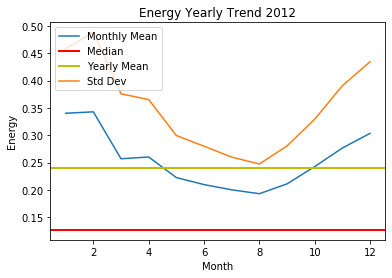

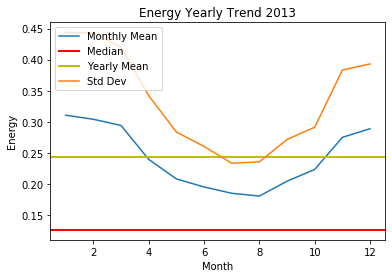

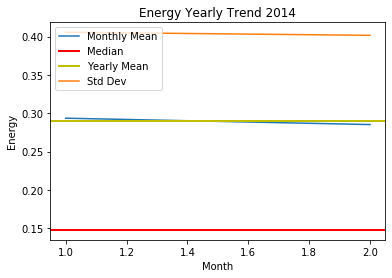

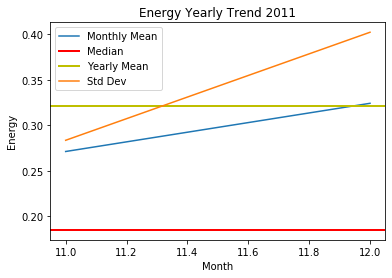

Monthly trends for:  Adversity


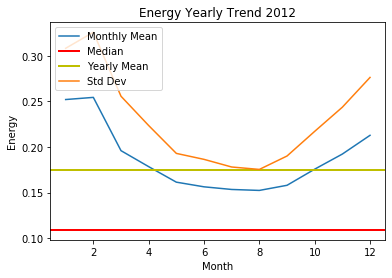

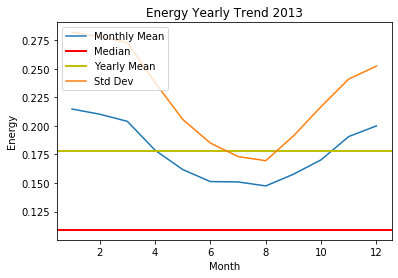

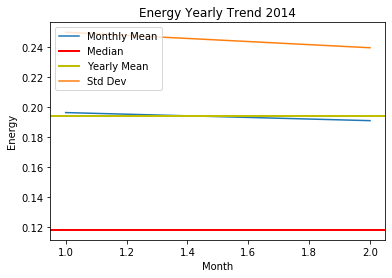

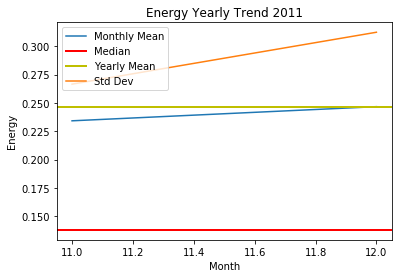

Monthly trends for:  Comfortable


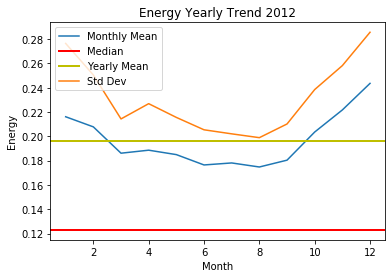

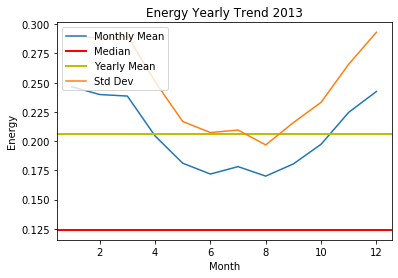

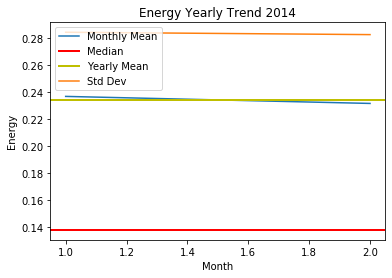

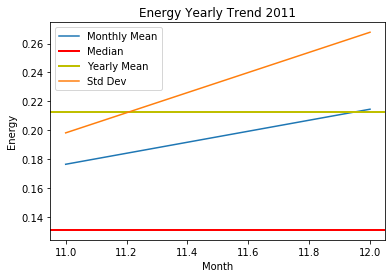

Monthly trends for:  ACORN-U


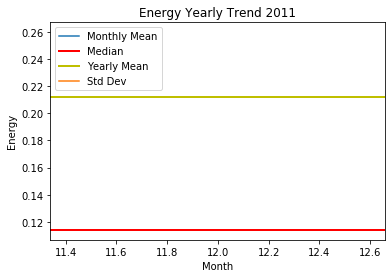

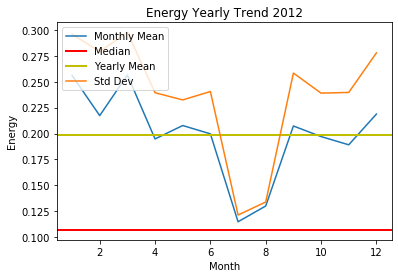

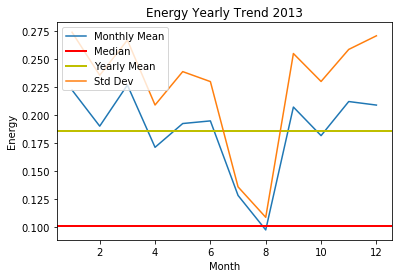

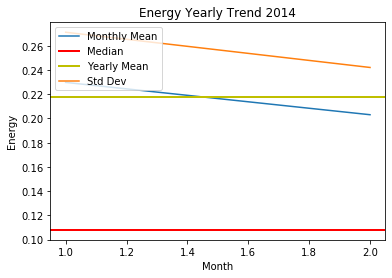

In [62]:

#This is the per month energy usage for each year for dataframes1 according to income groups for the first 30 files
#Use these values in PDF. These are graphs for the first 30CSV files and show year wise energy trend (or per month)


for j in (df1['Acorn_grouped'].unique()):
    df_grouped = df1[df1['Acorn_grouped'] == j]
    print("Monthly trends for: ",j)
    for i in (df_grouped['DateTime'].dt.year.unique()):
        YearlyTrend(df_grouped[df_grouped['DateTime'].dt.year == i], i)



Monthly trends for:  Affluent


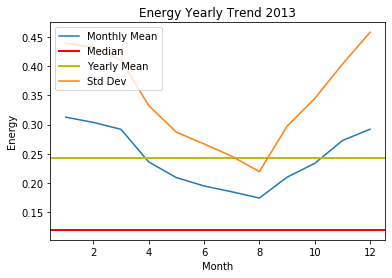

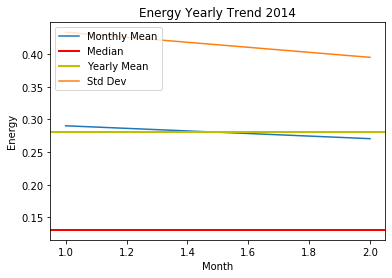

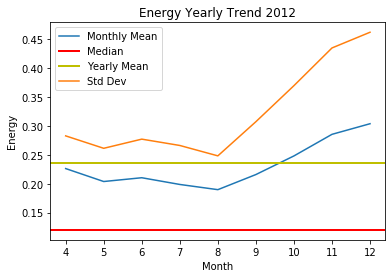

Monthly trends for:  Adversity


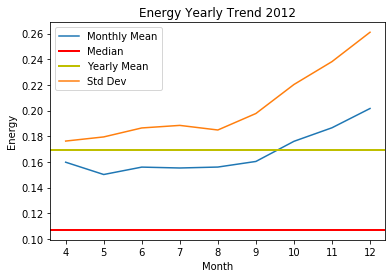

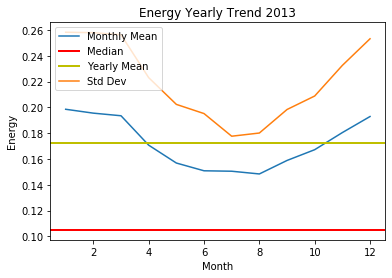

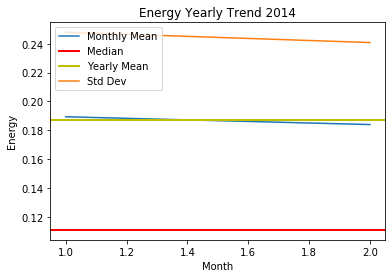

Monthly trends for:  Comfortable


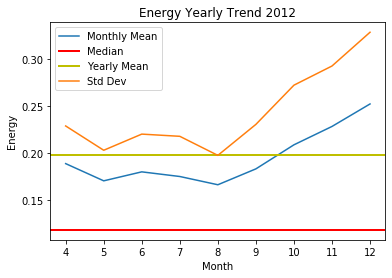

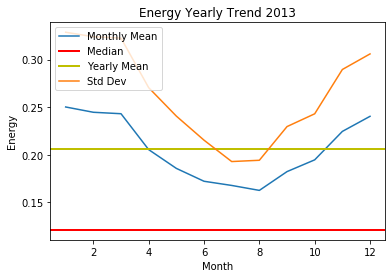

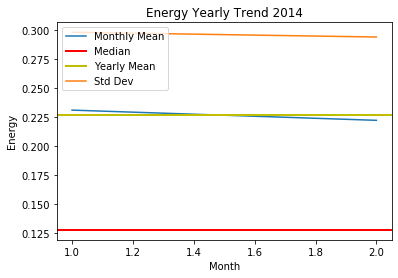

Monthly trends for:  ACORN-U


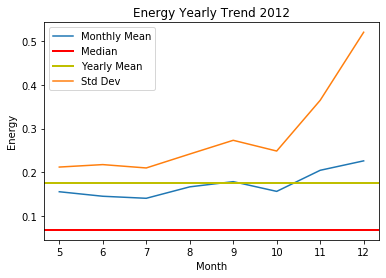

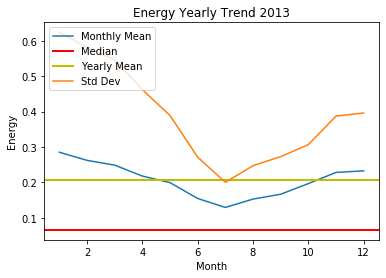

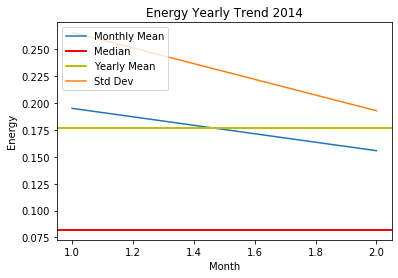

In [63]:
#This is the per month energy usage for each year for dataframes2 according to income groups for the files 31-60

for j in (df2['Acorn_grouped'].unique()):
    df_grouped = df2[df2['Acorn_grouped'] == j]
    print("Monthly trends for: ",j)
    for i in (df_grouped['DateTime'].dt.year.unique()):
        YearlyTrend(df_grouped[df_grouped['DateTime'].dt.year == i], i)

Monthly trends for:  Affluent


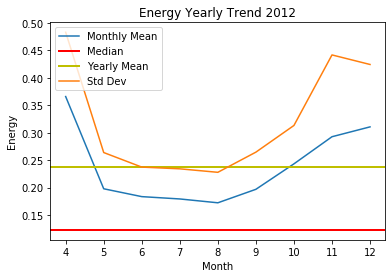

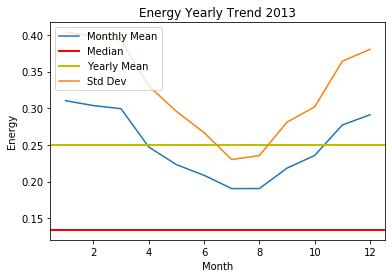

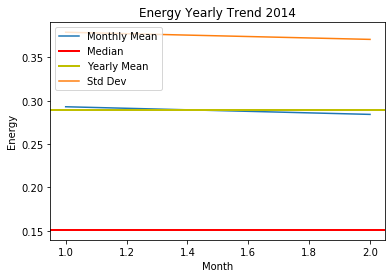

Monthly trends for:  Adversity


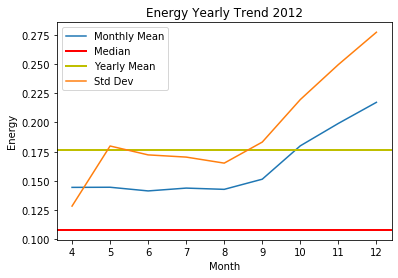

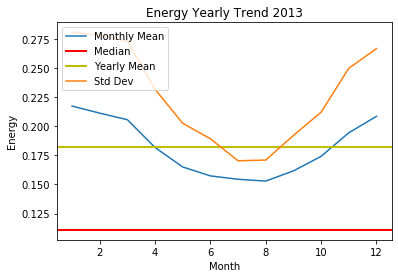

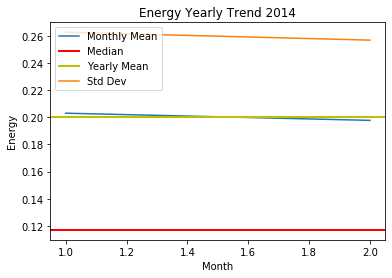

Monthly trends for:  Comfortable


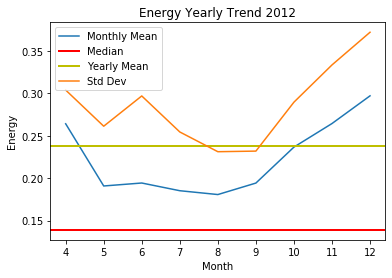

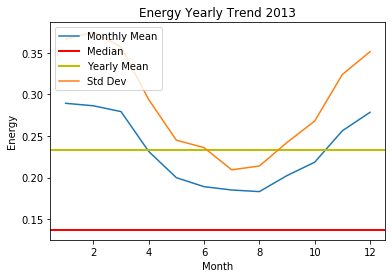

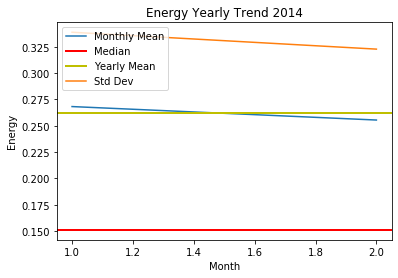

Monthly trends for:  ACORN-U


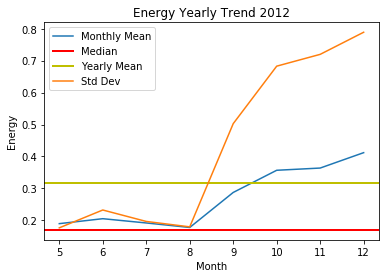

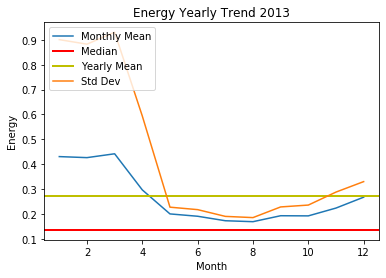

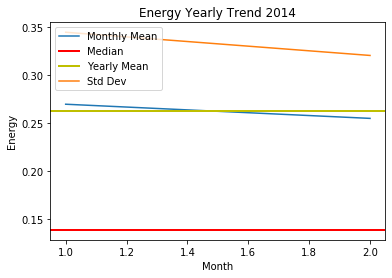

In [64]:
# This is the same function being used to show the per month trends for dataframes3 (CSV files 61-90)
#Use these values in PDF. These are graphs for the first 30CSV files and show year wise energy trend (or per month)

for j in (df3['Acorn_grouped'].unique()):
    df_grouped = df3[df3['Acorn_grouped'] == j]
    print("Monthly trends for: ",j)
    for i in (df_grouped['DateTime'].dt.year.unique()):
        YearlyTrend(df_grouped[df_grouped['DateTime'].dt.year == i], i)

Monthly trends for:  Adversity


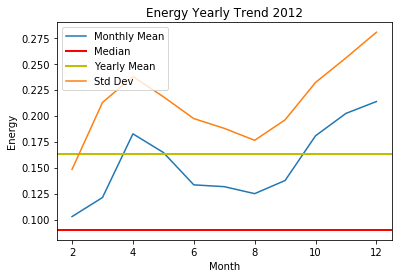

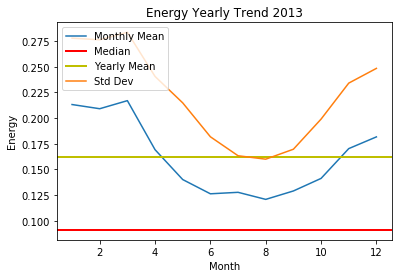

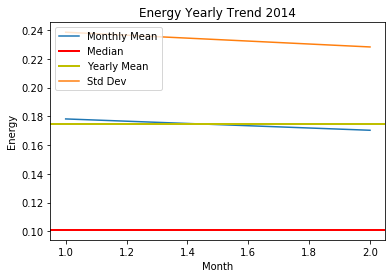

Monthly trends for:  Affluent


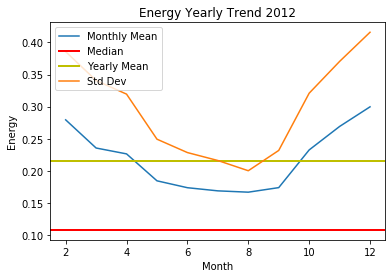

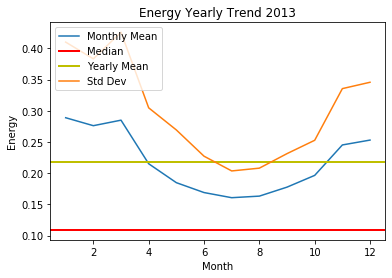

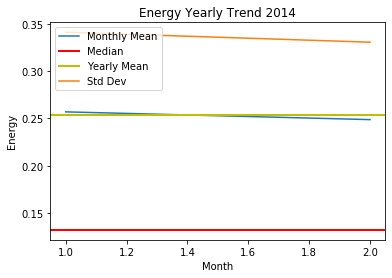

Monthly trends for:  Comfortable


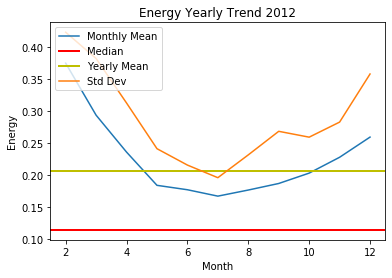

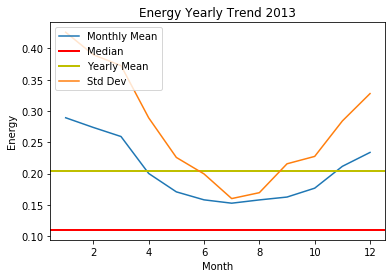

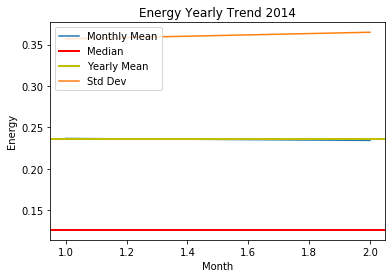

Monthly trends for:  ACORN-


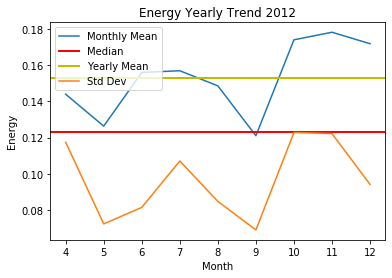

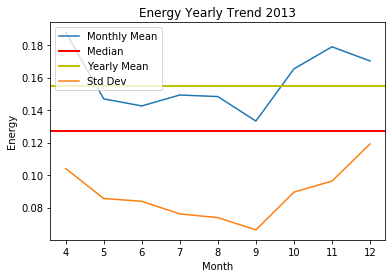

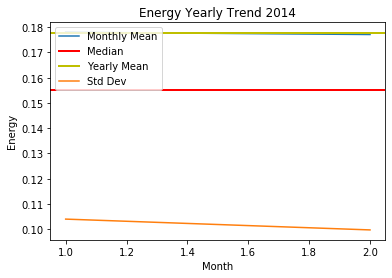

In [65]:
# This is the same function being used to show the per month trends for dataframes4 (CSV files 166-168)
#Use these values in PDF. These are graphs for the first 30CSV files and show year wise energy trend (or per month)


for j in (df['Acorn_grouped'].unique()):
    df_grouped = df[df['Acorn_grouped'] == j]
    print("Monthly trends for: ",j)
    for i in (df_grouped['DateTime'].dt.year.unique()):
        YearlyTrend(df_grouped[df_grouped['DateTime'].dt.year == i], i)


These are hourly trends for all datsets in dataframes1, that is std users, across 2011, 2012, 2013 and 2014 grouped according to income groups
Acorn Group:  Affluent


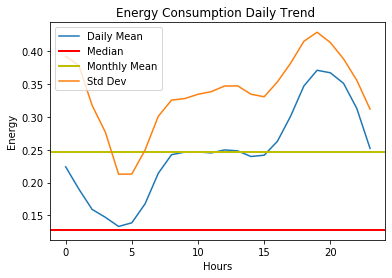

Acorn Group:  Adversity


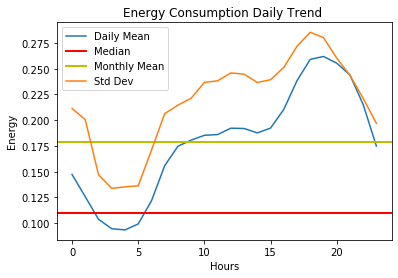

Acorn Group:  Comfortable


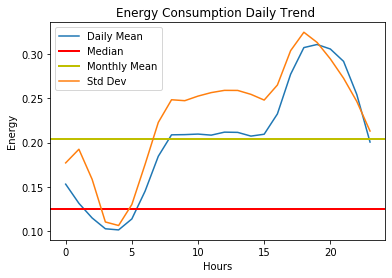

Acorn Group:  ACORN-U


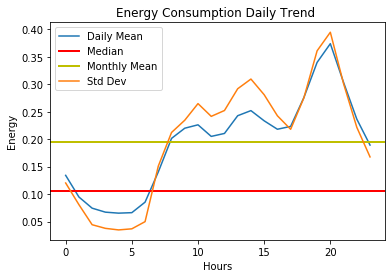

In [11]:

# This is the hourly trend according to group types for dataframes1 across the whole year. 
# As in it shows the average reading of all the years where hour was 01:00 and so on and does this for each income group
hour = df1['DateTime'].dt.hour.unique()
hour = np.sort(hour)
# print(months)
print("These are hourly trends for all datsets in dataframes1, that is std users, across 2011, 2012, 2013 and 2014 grouped according to income groups")
for j in (df1['Acorn_grouped'].unique()):
    print("Acorn Group: ", j)
    df_grouped = df1[df1['Acorn_grouped'] == j]
    DailyTrend(df_grouped)

These are hourly trends for all datsets in dataframes2, that is std users, across 2012, 2013 and 2014 grouped according to income groups
Acorn Group:  Affluent


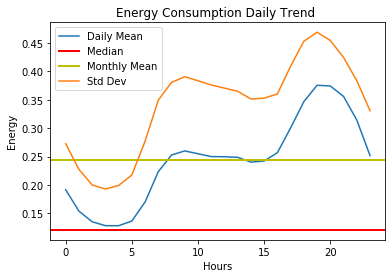

Acorn Group:  Adversity


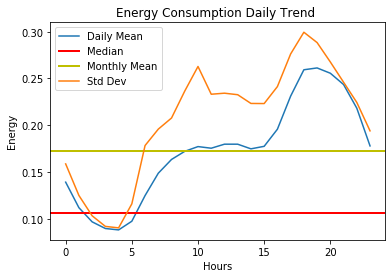

Acorn Group:  Comfortable


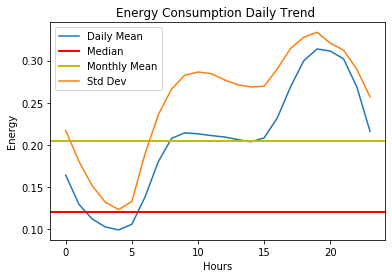

Acorn Group:  ACORN-U


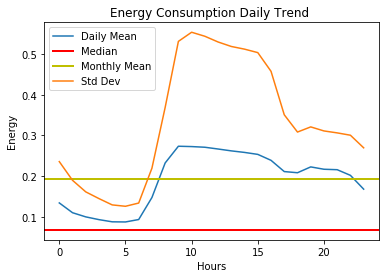

In [12]:
# This is the hourly trend according to group types for dataframes2 across the whole year. 
# As in it shows the average reading of all the years where hour was 01:00 and so on and does this for each income group
hour = df2['DateTime'].dt.hour.unique()
hour = np.sort(hour)
# print(months)
print("These are hourly trends for all datsets in dataframes2, that is std users, across 2012, 2013 and 2014 grouped according to income groups")
for j in (df2['Acorn_grouped'].unique()):
    print("Acorn Group: ", j)
    df_grouped = df2[df2['Acorn_grouped'] == j]
    DailyTrend(df_grouped)

These are hourly trends for all datsets in dataframes3, that is std users, across 2012, 2013 and 2014 grouped according to income groups
Acorn Group:  Affluent


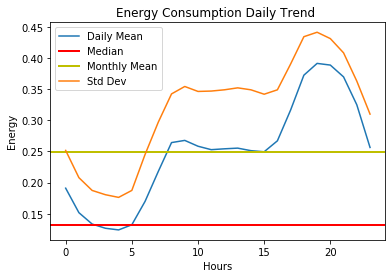

Acorn Group:  Adversity


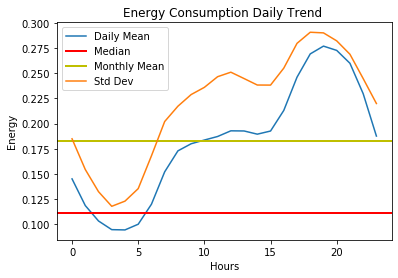

Acorn Group:  Comfortable


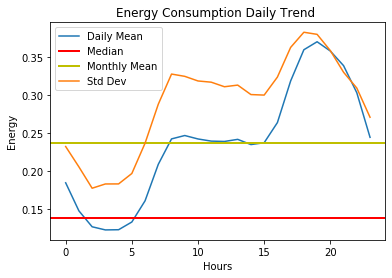

Acorn Group:  ACORN-U


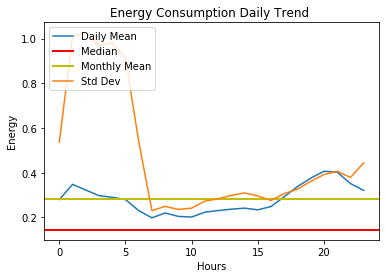

In [13]:
# This is the hourly trend according to group types for dataframes3 across the whole year. 
# As in it shows the average reading of all the years where hour was 01:00 and so on and does this for each income group
hour = df3['DateTime'].dt.hour.unique()
hour = np.sort(hour)
# print(months)
print("These are hourly trends for all datsets in dataframes3, that is std users, across 2012, 2013 and 2014 grouped according to income groups")
for j in (df3['Acorn_grouped'].unique()):
    print("Acorn Group: ", j)
    df_grouped = df3[df3['Acorn_grouped'] == j]
    DailyTrend(df_grouped)

These are hourly trends for all datsets in dataframes4, that is DToU users, across 2012, 2013 and 2014 grouped according to income groups
Acorn Group:  Adversity


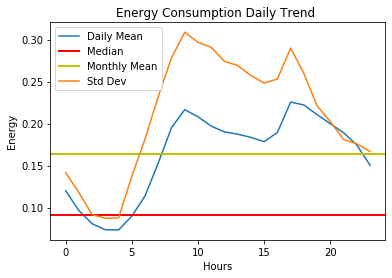

Acorn Group:  Affluent


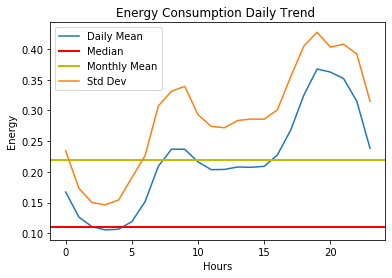

Acorn Group:  Comfortable


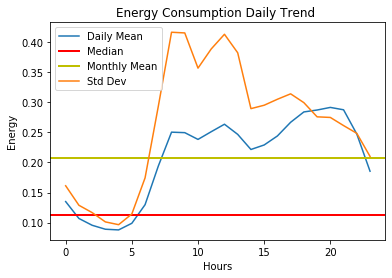

Acorn Group:  ACORN-


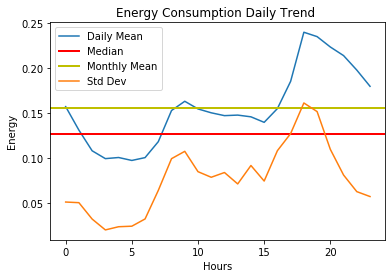

In [14]:
# This is the hourly trend according to group types for dataframes4 across the whole year. 
# As in it shows the average reading of all the years where hour was 01:00 and so on and does this for each income group
# This is also for only and all DtoU
hour = df['DateTime'].dt.hour.unique()
hour = np.sort(hour)
# print(months)
print("These are hourly trends for all datsets in dataframes4, that is DToU users, across 2012, 2013 and 2014 grouped according to income groups")
for j in (df['Acorn_grouped'].unique()):
    print("Acorn Group: ", j)
    df_grouped = df[df['Acorn_grouped'] == j]
    DailyTrend(df_grouped)

In [15]:
# this is the correlation between energy used and income group for dataframes4
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
X = ohe.fit_transform(df.Acorn_grouped.values.reshape(-1,1)).toarray()
df['Affluent'] = X[:,0]
df['Comfortable'] = X[:,1]
df['Adversity'] = X[:,2]

myCorr = df.corr()
myCorr['Energy']

Energy         1.000000
Affluent      -0.016087
Comfortable   -0.069008
Adversity      0.053174
Name: Energy, dtype: float64

In [16]:
# this is the correlation between energy used and income group for dataframes1

ohe = OneHotEncoder()
X1 = ohe.fit_transform(df1.Acorn_grouped.values.reshape(-1,1)).toarray()
df1['Affluent'] = X1[:,0]
df1['Comfortable'] = X1[:,1]
df1['Adversity'] = X1[:,2]

myCorr1 = df1.corr()
myCorr1['Energy']

Energy         1.000000
Affluent      -0.002940
Comfortable   -0.084079
Adversity      0.096032
Name: Energy, dtype: float64

In [17]:
# this is the correlation between energy used and income group for dataframes2

ohe = OneHotEncoder()
X2 = ohe.fit_transform(df2.Acorn_grouped.values.reshape(-1,1)).toarray()
df2['Affluent'] = X2[:,0]
df2['Comfortable'] = X2[:,1]
df2['Adversity'] = X2[:,2]

myCorr2 = df2.corr()
myCorr2['Energy']

Energy         1.000000
Affluent      -0.004405
Comfortable   -0.089682
Adversity      0.094469
Name: Energy, dtype: float64

In [18]:
# this is the correlation between energy used and income group for dataframes3

ohe = OneHotEncoder()
X3 = ohe.fit_transform(df3.Acorn_grouped.values.reshape(-1,1)).toarray()
df3['Affluent'] = X3[:,0]
df3['Comfortable'] = X3[:,1]
df3['Adversity'] = X3[:,2]

myCorr3 = df3.corr()
myCorr3['Energy']

Energy         1.000000
Affluent       0.020067
Comfortable   -0.099961
Adversity      0.063788
Name: Energy, dtype: float64

In [56]:
#this block reads the tariff file into a dataframe called tariffdf
#then makes two new dataframes for only those rows where the tariff was high and low
#tariffdfhigh contain only rows from the tariff file where the tariff was high and does the same thing for low 
#this block also shows the number of days for each month where the tariff was high and low
#it also shows that there are 28 days where the tariff was both high and low at some point - as shown by intersection
tariffdf = pd.read_excel (r'C:\Users\Abdullah\Desktop\dmfiles\Tariffs.xlsx')
l = ["High"]
l1 = ["Low"]


tariffdfhigh=tariffdf.loc[tariffdf['Tariff'].isin(l)]
tariffdflow=tariffdf.loc[tariffdf['Tariff'].isin(l1)]
ax=tariffdfhigh['TariffDateTime'].dt.date.unique()
ax1=tariffdflow['TariffDateTime'].dt.date.unique()
Months=["J","F","M","A","M","J","J","A","S","O","N","D"]
print(Months)
high_days=[9,10,8,5,6,7,4,2,6,7,4,9]
print("Number of days for each month where tariff was high")
print(high_days)
low_days=[9,9,12,6,6,6,7,6,5,10,9,19]
print("Number of days for each month where tariff was low")
print(low_days)

list1 = ax
list2 = ax1
list1_as_set = set(list1)
intersection = list1_as_set.intersection(list2)
intersection_as_list = list(intersection)
print(len(intersection_as_list))



['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']
Number of days for each month where tariff was high
[9, 10, 8, 5, 6, 7, 4, 2, 6, 7, 4, 9]
Number of days for each month where tariff was low
[9, 9, 12, 6, 6, 6, 7, 6, 5, 10, 9, 19]
28


Acorn Group:  Affluent


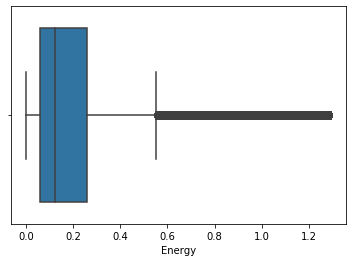

Acorn Group:  Adversity


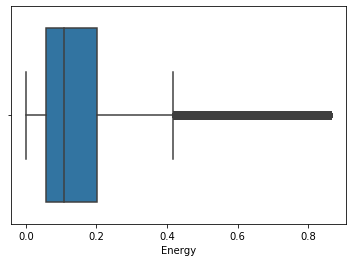

Acorn Group:  Comfortable


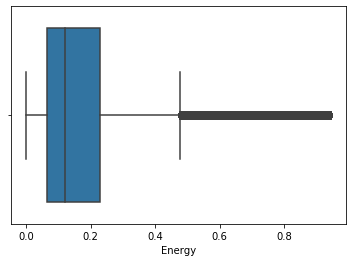

Acorn Group:  ACORN-U


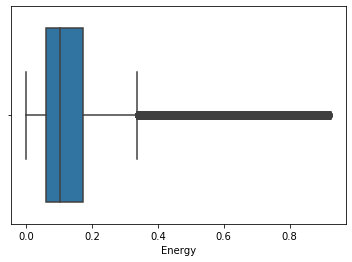

In [22]:
#this block constructs energy usage for each group in dataframe1 - first 30 files
#the function is defined only once in this block and the other block just run the for loop for the other dataframes
from scipy import stats
import seaborn as sns
def plotBoxPlotwoOutliers(df):
    
    edf = df['Energy'].to_frame()
    z = np.abs(stats.zscore(edf))
    edf = edf[(z < 3).all(axis=1)] 
    a = sns.boxplot(x = edf['Energy'])
    plt.show()
#for dataframe1   
for j in (df1['Acorn_grouped'].unique()):
    print("Acorn Group: ", j)
    df_grouped = df1[df1['Acorn_grouped'] == j]
    plotBoxPlotwoOutliers(df_grouped)

Acorn Group:  Affluent


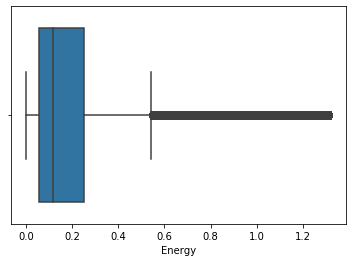

Acorn Group:  Adversity


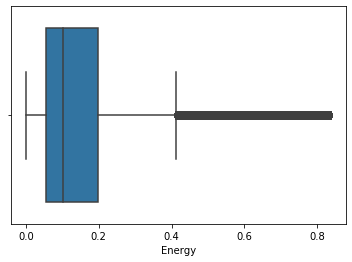

Acorn Group:  Comfortable


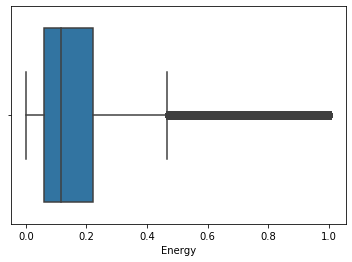

Acorn Group:  ACORN-U


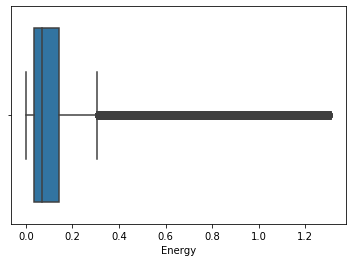

In [23]:
#this block constructs energy usage for each group in dataframes2 - files 31-60 
for j in (df2['Acorn_grouped'].unique()):
    print("Acorn Group: ", j)
    df_grouped = df2[df2['Acorn_grouped'] == j]
    plotBoxPlotwoOutliers(df_grouped)

Acorn Group:  Affluent


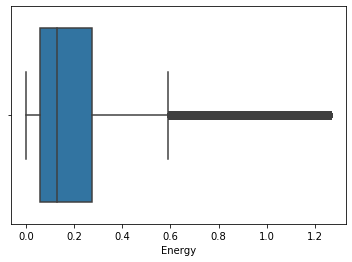

Acorn Group:  Adversity


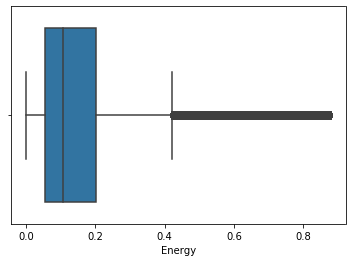

Acorn Group:  Comfortable


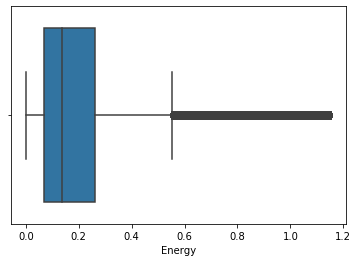

Acorn Group:  ACORN-U


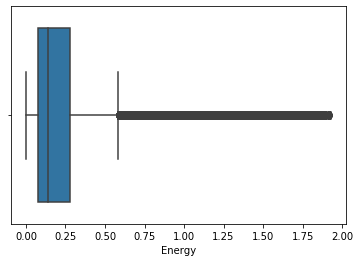

In [24]:
#this block constructs energy usage for each group in dataframes2 - files 61-90 
    
for j in (df3['Acorn_grouped'].unique()):
    print("Acorn Group: ", j)
    df_grouped = df3[df3['Acorn_grouped'] == j]
    plotBoxPlotwoOutliers(df_grouped)

Acorn Group:  Adversity


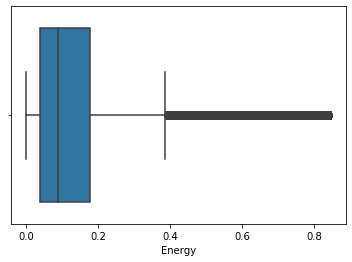

Acorn Group:  Affluent


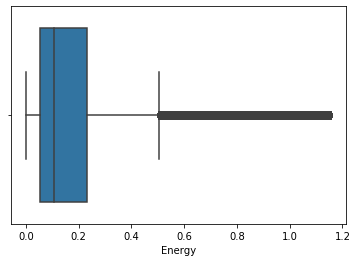

Acorn Group:  Comfortable


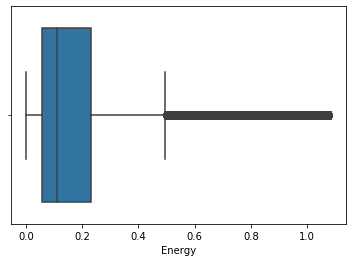

Acorn Group:  ACORN-


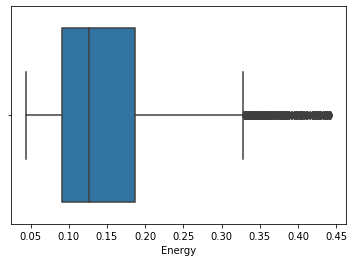

In [26]:
#this block constructs energy usage for each group in dataframes2 - files 166-168
    
for j in (df['Acorn_grouped'].unique()):
    print("Acorn Group: ", j)
    df_grouped = df[df['Acorn_grouped'] == j]
    plotBoxPlotwoOutliers(df_grouped)

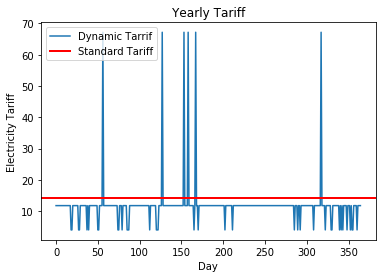

In [59]:
#this block shows daily tariff rates for the year 2013 and how they changed between low, normal and high for the whole year.
#the blue bars show readings for the dtou houses as the tariffs only changed for dtou houses
#the red line indicated a frame of reference i.e the the rate which was charged for all the houses in the std group
#use this graph and the arrays above to describe the trend and only compare with the 2013 graph for dataframes4
#for example, towards the end of year or the last 2 months, the tarrifs were lower than normal 
#if you go back to the 2013 graph for dtou houses or dataframe4, you will see that there was an increase in average energy usage
#this could be explained by cheaper electricity rates
#compare this graph with the 20113 dataframes4 graph in other ways too (i.e for high tarrifs)
tariffdf['TariffDateTime'] = pd.to_datetime(tariffdf['TariffDateTime'])
def showTariff(df):
    
    Dates = []
    for i in df['TariffDateTime'].dt.date.unique():
        df2 = df[df['TariffDateTime'].dt.date == i]
        val = df2['Tariff'].value_counts().idxmax()
        Dates.append(val)

    Rates = []
    for i in Dates:
        if i == 'Normal':
            Rates.append(11.76)
        if i == 'High':
            Rates.append(67.20)
        if i == 'Low':
            Rates.append(3.99)

    plt.plot(Rates, label = 'Dynamic Tarrif')
    plt.axhline(y = 14.228, linewidth = 2, color = 'r', label = 'Standard Tariff')
    plt.xlabel("Day")
    plt.ylabel("Electricity Tariff")
    plt.title("Yearly Tariff")
    plt.legend(loc='upper left', ncol = 1)
showTariff(tariffdf)